In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

In [ ]:
from google.colab import files 

In [ ]:
uploaded = files.upload()


Saving mnist train.csv.zip to mnist train.csv.zip
Saving mnist test.csv.zip to mnist test.csv.zip
Saving mnist sample_submission (1).csv to mnist sample_submission (1).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('./mnist train.csv.zip',low_memory=False)

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape



In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[7 3 6 ... 3 7 7] [4 3 1 ... 7 3 2]
0.04826829268292683
Iteration:  10
[6 3 3 ... 3 5 6] [4 3 1 ... 7 3 2]
0.13265853658536586
Iteration:  20
[6 3 1 ... 3 3 6] [4 3 1 ... 7 3 2]
0.20082926829268294
Iteration:  30
[6 3 1 ... 3 3 6] [4 3 1 ... 7 3 2]
0.30309756097560975
Iteration:  40
[6 1 1 ... 3 3 6] [4 3 1 ... 7 3 2]
0.36621951219512194
Iteration:  50
[6 1 1 ... 1 3 6] [4 3 1 ... 7 3 2]
0.4115121951219512
Iteration:  60
[6 1 1 ... 7 3 6] [4 3 1 ... 7 3 2]
0.4554146341463415
Iteration:  70
[7 1 1 ... 7 3 6] [4 3 1 ... 7 3 2]
0.5070487804878049
Iteration:  80
[4 1 1 ... 7 3 6] [4 3 1 ... 7 3 2]
0.5491707317073171
Iteration:  90
[4 7 1 ... 7 3 6] [4 3 1 ... 7 3 2]
0.5822682926829268
Iteration:  100
[4 7 1 ... 7 3 6] [4 3 1 ... 7 3 2]
0.6098048780487805
Iteration:  110
[4 7 1 ... 7 3 6] [4 3 1 ... 7 3 2]
0.6314390243902439
Iteration:  120
[4 7 1 ... 7 3 6] [4 3 1 ... 7 3 2]
0.6504878048780488
Iteration:  130
[4 7 1 ... 7 3 6] [4 3 1 ... 7 3 2]
0.6665121951219513
Iteration:  

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


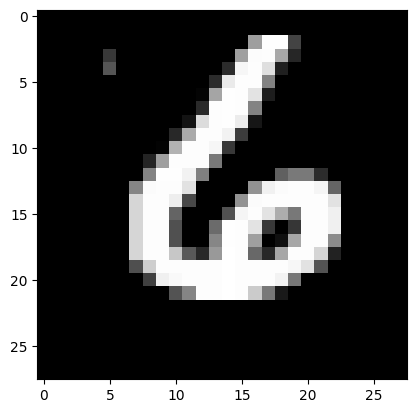

In [ ]:
test_prediction(999, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 5 1 2 4 7 0 6 5 7 4 0 6 9 8 6 8 8 2 9 8 4 7 1 3 3 0 4 2 3 3 4 3 0 6 4 2
 3 0 1 2 0 6 3 7 1 8 0 7 7 8 8 5 9 8 0 7 4 3 6 4 9 4 1 4 0 5 4 5 8 3 7 3 0
 7 8 9 3 9 2 9 6 3 6 6 5 7 6 1 4 6 7 5 3 4 7 2 2 5 5 4 5 8 4 5 1 4 2 6 5 7
 3 8 1 2 9 3 2 3 9 0 0 7 0 8 9 4 8 8 6 5 3 5 7 5 2 5 7 4 2 7 2 6 1 1 3 9 6
 3 4 3 1 0 1 3 4 7 7 6 1 5 7 1 6 6 7 4 1 9 1 0 6 6 8 3 7 1 1 2 8 8 9 8 4 2
 9 8 2 7 1 3 1 6 7 3 0 2 6 5 8 7 0 7 5 1 7 6 1 5 6 7 5 0 4 6 4 5 9 4 6 0 9
 1 0 6 0 8 6 4 3 8 1 6 8 3 1 2 6 9 8 0 3 3 8 7 6 2 6 4 9 1 0 3 9 7 7 0 3 3
 2 9 2 0 0 5 7 6 6 4 3 0 9 9 3 2 9 6 5 5 7 5 9 0 7 4 2 3 3 1 7 9 4 3 4 6 7
 7 1 2 2 9 9 4 3 4 0 8 5 6 8 4 1 5 6 4 0 7 3 3 1 5 1 1 3 1 1 8 6 2 7 3 2 2
 4 8 6 6 1 5 1 6 9 0 7 0 5 1 1 6 2 3 9 4 8 5 9 0 2 3 7 6 7 0 5 4 9 0 6 0 1
 0 2 7 8 8 5 6 8 8 5 3 3 2 7 1 9 7 3 5 3 3 1 5 9 3 1 4 3 8 3 1 5 7 8 7 9 8
 5 2 2 0 5 3 6 8 2 6 0 2 5 6 8 0 2 4 2 0 4 0 0 8 6 3 4 9 6 8 7 7 8 6 3 8 3
 2 3 1 9 5 8 4 3 0 4 2 9 1 4 7 6 4 7 9 1 4 7 5 7 8 4 6 9 0 4 5 5 4 7 4 8 0
 8 4 7 3 8 0 6 2 1 4 5 4 

0.832

the above approach is completely from scratch using only numpy arrays and the gradient descent algorithm now we implement using the  fuction in tensorflow and keras 

In [45]:
import tensorflow as tf

In [54]:
mnist =tf.keras.datasets.mnist
(X_train,Y_train) ,(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [55]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)


model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#input layer which is a image of 28 *28 pixes flattened into 784 numerons
model.add(tf.keras.layers.Dense(128,activation='relu'))
#invisible layer 1 which has 128 nuerons attached to each of the 784 nuerons in the input layer
model.add(tf.keras.layers.Dense(128,activation='relu'))
#invisible layer 2
model.add(tf.keras.layers.Dense(10,activation='softmax'))
#out put layer which has 10 nodes each representing a number from 0 to 9 


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=5)


model.save('hand_written_predictor.model')


 

 

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2629 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1074 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0732 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0535 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0407 - accuracy: 0.9868


In [56]:
model=tf.keras.models.load_model('hand_written_predictor.model')

In [57]:
loss ,accuracy =model.evaluate(X_test,Y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 2s 4ms/step - loss: 0.1129 - accuracy: 0.9687
0.9686999917030334
0.11292044818401337
